In [5]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE.
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома,
# построить график зависимости максимального модуля параметров, MSE
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома,
# построить график зависимости максимального модуля параметров, MSE
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [7]:
data = pd.read_csv('Advertising.csv')
data = data.drop(columns=["Unnamed: 0"])

In [8]:
# 1. Модель с использованием всех входных переменных
X_all = data[["TV", "radio", "newspaper"]]
y = data["sales"]


In [9]:
# Разделение на обучающую и тестовую выборки
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [10]:
# Построение модели
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)


LinearRegression()

In [11]:
# Прогнозы и MSE
y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)

# Вывод коэффициентов и MSE для модели со всеми переменными
print("Модель со всеми входными переменными:")
print(f"MSE: {mse_all}")
print(f"Коэффициенты: {model_all.coef_}")
print(f"Свободный член: {model_all.intercept_}")

Модель со всеми входными переменными:
MSE: 3.1740973539761064
Коэффициенты: [0.04472952 0.18919505 0.00276111]
Свободный член: 2.9790673381226327


In [12]:
# 2. Модель с использованием только 2 и 3 столбцов (radio и newspaper)
X_subset = data[["radio", "newspaper"]]

# Разделение на обучающую и тестовую выборки
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y, test_size=0.2, random_state=42
)


In [13]:
# Построение модели
model_subset = LinearRegression()
model_subset.fit(X_train_subset, y_train_subset)

LinearRegression()

In [14]:
# Прогнозы и MSE
y_pred_subset = model_subset.predict(X_test_subset)
mse_subset = mean_squared_error(y_test_subset, y_pred_subset)

# Вывод коэффициентов и MSE для модели с двумя переменными
print("\nМодель с двумя входными переменными (radio, newspaper):")
print(f"MSE: {mse_subset}")
print(f"Коэффициенты: {model_subset.coef_}")
print(f"Свободный член: {model_subset.intercept_}")


Модель с двумя входными переменными (radio, newspaper):
MSE: 23.2046437454446
Коэффициенты: [0.20314733 0.0023628 ]
Свободный член: 9.38212216190039


In [16]:
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


Степень полинома: 1, MSE: 3.174097353976104
Степень полинома: 2, MSE: 0.4129102285379068
Степень полинома: 3, MSE: 0.2945684091022626
Степень полинома: 4, MSE: 0.6179511231200484
Степень полинома: 5, MSE: 76.50122197409382
Степень полинома: 6, MSE: 820.937512815404
Степень полинома: 7, MSE: 4631325.749973683
Степень полинома: 8, MSE: 28458975.846582986
Степень полинома: 9, MSE: 5896784676.425528
Степень полинома: 10, MSE: 151286514056.78555


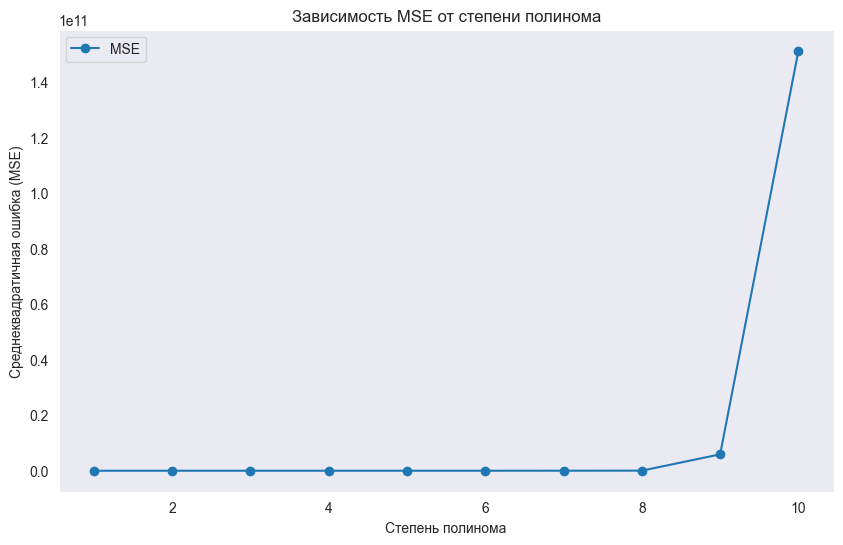

In [17]:
# Максимальная степень полинома
max_pow = 10

mse_poly = []

for degree in range(1, max_pow + 1):
    # Генерация полиномиальных признаков
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_all)

    # Разделение на обучающую и тестовую выборки
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )

    # Построение модели
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train_poly)

    # Прогнозы и расчет MSE
    y_pred_poly = model_poly.predict(X_test_poly)
    mse = mean_squared_error(y_test_poly, y_pred_poly)
    mse_poly.append(mse)

    print(f"Степень полинома: {degree}, MSE: {mse}")

# Вывод зависимости MSE от степени полинома

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_pow + 1), mse_poly, marker='o', label='MSE')
plt.xlabel('Степень полинома')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Зависимость MSE от степени полинома')
plt.legend()
plt.grid()
plt.show()

In [18]:
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома,
# построить график зависимости максимального модуля параметров, MSE
# от величины alpha.

In [19]:
from sklearn.linear_model import Ridge


In [22]:
# Оптимальная степень полинома (предположим, минимальный MSE на step_optimal)
optimal_degree = mse_poly.index(min(mse_poly)) + 1

In [23]:
# Генерация полиномиальных признаков для оптимальной степени
poly_optimal = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_poly_optimal = poly_optimal.fit_transform(X_all)

In [24]:
# Разделение на обучающую и тестовую выборки
X_train_poly_optimal, X_test_poly_optimal, y_train_poly_optimal, y_test_poly_optimal = train_test_split(
    X_poly_optimal, y, test_size=0.2, random_state=42
)

alphas = np.logspace(-3, 3, 50)

# Списки для хранения результатов
mse_ridge = []
max_coef_magnitude = []

# Цикл по значениям alpha
for alpha in alphas:
    # Гребневая регрессия
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly_optimal, y_train_poly_optimal)

    # Прогнозы и расчет MSE
    y_pred_ridge = ridge_model.predict(X_test_poly_optimal)
    mse = mean_squared_error(y_test_poly_optimal, y_pred_ridge)
    mse_ridge.append(mse)

    # Максимальный модуль коэффициентов
    max_coef_magnitude.append(np.max(np.abs(ridge_model.coef_)))


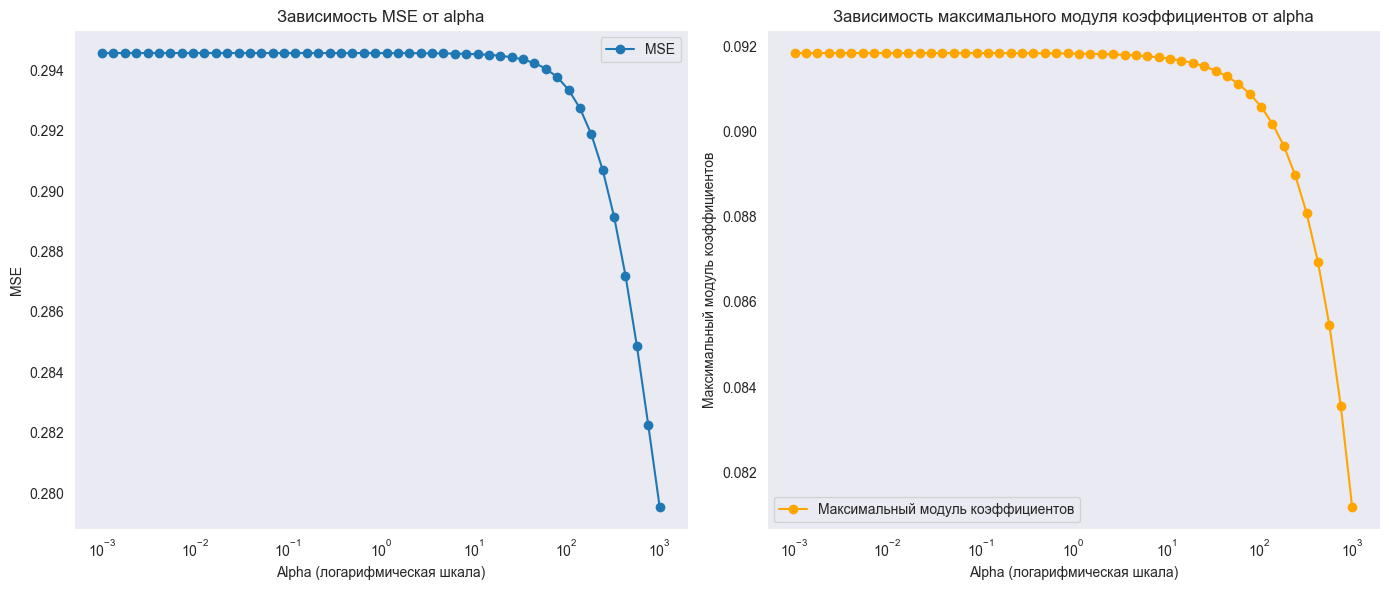

In [25]:
# Построение графиков
plt.figure(figsize=(14, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_ridge, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')
plt.grid()
plt.legend()

# График зависимости максимального модуля коэффициентов от alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, max_coef_magnitude, marker='o', color='orange', label='Максимальный модуль коэффициентов')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('Максимальный модуль коэффициентов')
plt.title('Зависимость максимального модуля коэффициентов от alpha')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома,
# построить график зависимости максимального модуля параметров, MSE
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [26]:
from sklearn.linear_model import Lasso

In [27]:
# Оптимальная степень полинома (выбираем из предыдущего шага)
optimal_degree = mse_poly.index(min(mse_poly)) + 1

In [28]:
# Генерация полиномиальных признаков для оптимальной степени
poly_optimal = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_poly_optimal = poly_optimal.fit_transform(X_all)

In [30]:
# Разделение на обучающую и тестовую выборки
X_train_poly_optimal, X_test_poly_optimal, y_train_poly_optimal, y_test_poly_optimal = train_test_split(
    X_poly_optimal, y, test_size=0.2, random_state=42
)

# Значения alpha для исследования
alphas = np.logspace(-3, 3, 50)

# Списки для хранения результатов
mse_lasso = []
max_coef_magnitude_lasso = []

# Цикл по значениям alpha
for alpha in alphas:
    # Lasso-регрессия
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_poly_optimal, y_train_poly_optimal)

    # Прогнозы и расчет MSE
    y_pred_lasso = lasso_model.predict(X_test_poly_optimal)
    mse = mean_squared_error(y_test_poly_optimal, y_pred_lasso)
    mse_lasso.append(mse)

    # Максимальный модуль коэффициентов
    max_coef_magnitude_lasso.append(np.max(np.abs(lasso_model.coef_)))


/Library/Python/3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Python/3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Python/3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+01, tolerance: 4.150e-01
  model = cd_f

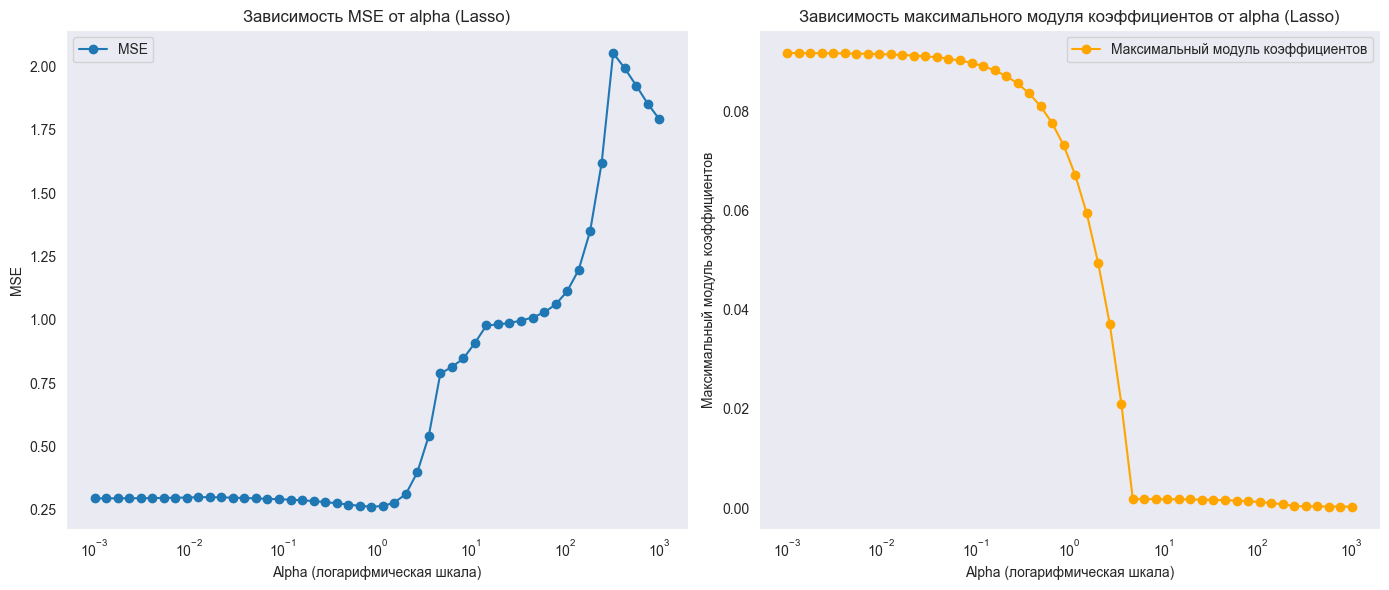

In [31]:
# Построение графиков
plt.figure(figsize=(14, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_lasso, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha (Lasso)')
plt.grid()
plt.legend()

# График зависимости максимального модуля коэффициентов от alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, max_coef_magnitude_lasso, marker='o', color='orange', label='Максимальный модуль коэффициентов')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('Максимальный модуль коэффициентов')
plt.title('Зависимость максимального модуля коэффициентов от alpha (Lasso)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()